In [2]:
# Sparks Foundation
# Task - 1
# Prediction using Supervised ML

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading Data from .csv file through Link

In [4]:
url = 'https://bit.ly/w-data'

In [5]:
data = pd.read_csv(url)

In [33]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

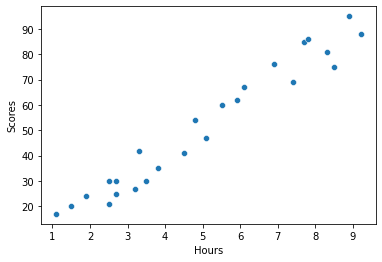

In [8]:
sns.scatterplot(x=data['Hours'], y=data['Scores'])

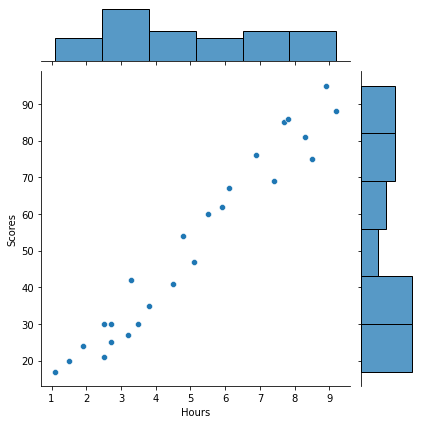

In [9]:
sns.jointplot(x='Hours', y='Scores', data=data)

In [34]:
# Splitting data into train-test set

In [10]:
X = data['Hours'].values
y = data['Scores'].values
X = X.reshape(-1, 1)

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# Fitting Linear Regressin Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
lm.coef_

array([9.55683096])

In [19]:
data.columns
cdf = pd.DataFrame(lm.coef_, ['Hours'], columns=['Coefficient'])
cdf

Index(['Hours', 'Scores'], dtype='object')

,Coefficient
Hours,9.556831


In [22]:
line = lm.coef_ * X + lm.intercept_

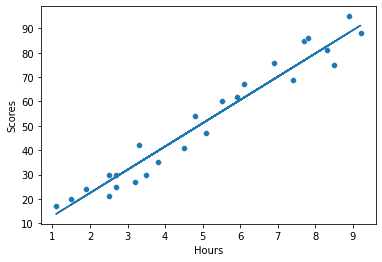

In [23]:
sns.scatterplot(x=data['Hours'], y=data['Scores'])
plt.plot(X, line)

In [ ]:
# Predcting percentages of students

In [24]:
prediction = lm.predict(X_test)

In [25]:
prediction

array([27.19360194, 46.30726387, 88.3573201 , 59.68682721, 82.62322152,
       76.88912294, 21.45950337, 17.63677098, 13.8140386 , 52.04136244])

In [26]:
y_test

array([21, 41, 95, 62, 81, 85, 24, 20, 17, 47], dtype=int64)

In [27]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':prediction})

In [28]:
df

,Actual,Predicted
0,21,27.193602
1,41,46.307264
2,95,88.357320
3,62,59.686827
4,81,82.623222
5,85,76.889123
6,24,21.459503
7,20,17.636771
8,17,13.814039
9,47,52.041362


In [29]:
hours = [[9.25]]
own_pred = lm.predict(hours)

In [30]:
own_pred

array([91.70221094])

In [ ]:
# Metrics

In [31]:
from sklearn import metrics 

In [32]:
metrics.mean_absolute_error(y_test, prediction)

4.332186657621795